# GOPH 619 Lab1


### <b>Question 1:</b>
Express the number 1.481 in floating point binary format, as
discussed in class. Clearly show the binary strings representing the
exponent and the mantissa. At what digit does the “true error” in the
mantissa reach zero? Do you think that your result has zero round-off
error? Explain

In [3]:
######
import numpy as np
import matplotlib.pyplot as plt

####Convert Decimal to mantissa and exponent
def decimal_2_mne(num):
    ########Convert decimal to base 2
    #Find if num is greater or less than 1
    n = 0
    while True:
        if num >1:
            num /= 2
            e = n+1
            n += 1
            #print(remainder,'if')
        else:
            num *= 2
            e = n-1
            n +=1
            #print(remainder,'else')
        if num>=0.5 and num <1:
            break
    print("Mantissa #:", num, "Exponent #:", e)
    return num, e

value = 1.481
man, e = decimal_2_mne(value)


####Convert mantissa and exponent to binary
def me_2_bin(m,e):
    ####### Converts mantissa to binary
    rem = m
    sb = np.zeros(53)
    i = 0
    for k in range(-1,-53,-1):
        if rem >= 2**k:
            #print("remainder:", rem, "2^k:", 2**k, "k:",k)
            sb[i] = 1
            rem -= 2**k
            i +=1
        else:
            sb[i]= 0   
            i +=1
    ########
    #Convert exponent to binary
    rem = e
    se = np.zeros(10)
    i = 0
    for k in range(9,0,-1):
        if rem >= 2**k:
            se[i] = 1
            rem -= 2**k
            i +=1
        else:
            se[i] = 0
            i +=1
    print("Exponent:", se, "Mantissa:", sb)
    return sb,se

mantissa, exponent = me_2_bin(man,e)


Mantissa #: 0.7405 Exponent #: 1
Exponent: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.] Mantissa: [1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 0.
 0. 1. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.
 1. 1. 0. 0. 0.]


##### <b>At what digit does the True error in the Mantissa reach zero? </b>
The True error in the Mantissa reaches zero at the 53rd digit because that is max for double precision

##### <b>Does the result have roundoff error?</b>


### <b>Question 2 </b>

Show the Taylor series for sin(x) for zero- through fifth-order.
Evaluate sin(x) for xi+1 = π/3 using a base point of xi = π/4 using the zero-
through fifth-order Taylor series expansions. Calculate the true and
approximate relative error for each estimate. Why is π/4 a convenient
base point for this function?

In [2]:
import math
def taylor_sin(x,x_true, order=5):

    """ n-order taylor series for sin 
    """
    h = x - x_true
    fun = math.sin(x_true)
    der1 = math.cos(x_true)
    der2 = -1*math.sin(x_true)
    der3 = -1*math.cos(x_true)
    der4 = math.sin(x_true)
    der5 = math.cos(x_true)
    der =[fun,der1,der2,der3,der4,der5]
    true_a = math.sin(x)

    ea = None
    fact = 1
    for i in range(6):
        if i ==0:
            sol = der[i]
            et = ((true_a-sol)/(true_a))*100    
        if i != 0:
            oldsol =sol
            fact *=i
            sol = oldsol + (der[i]/fact)*h**i
            #sol = oldsol + (der[i]/math.factorial(i))*h**i
            et = ((true_a-sol)/(true_a))*100
            ea = abs((sol - oldsol) / sol)*100
            #print(fact)
        print("Iterations:", i, "solution:",sol,"True Error:",et,"Approximate Error:", ea)            
                    
    return sol, ea, et


taylor_sin(math.pi/3,math.pi/4,5)

Iterations: 0 solution: 0.7071067811865475 True Error: 18.3503419072274 Approximate Error: None
Iterations: 1 solution: 0.8922269036098127 True Error: -3.0254885954703363 Approximate Error: 20.748099129750262
Iterations: 2 solution: 0.8679947362499555 True Error: -0.22739892581800955 Approximate Error: 2.791741279970057
Iterations: 3 solution: 0.8658800807233364 True Error: 0.016780461689357797 Approximate Error: 0.24422036881279358
Iterations: 4 solution: 0.8660184846039052 True Error: 0.0007989581487078311 Approximate Error: 0.01598163122719495
Iterations: 5 solution: 0.8660257314141455 True Error: -3.783141989694536e-05 Approximate Error: 0.0008367892520355209


(0.8660257314141455, 0.0008367892520355209, -3.783141989694536e-05)

$ \frac{\pi}{4} $ is a good base point to used because it evaluates the same value, but with different signs, for the derivatives. $\frac{1}{\sqrt{2}}$


### <b>Question 3</b>

Generate sample values of ex from x = 0 to x = 5 using a step
size Δx = 0.5. Estimate the value of e2.4 using zero- through fourth-order
polynomial interpolation. Do this using the Vandermonde matrix,
Newton IP and Lagrange IP methods. Calculate the true and approximate
relative error for each estimate

In [14]:
import numpy as np
import math
import matplotlib.pyplot as plt
#Create X array
dx = 0.5
X_a = np.arange(0,5,dx)
true_value = math.exp(2.4)

#Define E^x
def exp(x):
    """Exponential function

    Parameters
    ----------
    x : array_like
        Arguments to exp functions
    
    Returns
    -------
    numpy.ndarray
        Result of exp function
    """
    x = np.array(x) #Convert x to numpy array to check array_like
    #Initalization
    k = 0
    fact_k = 1
    x_k = np.ones_like(x)
    s = np.ones_like(x)
    err = np.ones_like(x)
    tol = 1.e-16
    #Iteration
    while err.max() > tol:
        k +=1         # increment iteration counter
        fact_k *= k     #Update factorial 
        x_k *= x        # update X^k
        t = x_k / fact_k
        s += t
        err = abs(t/s)

    return s

#Create true values of E^x
Y_a = np.zeros(X_a.shape)
for k, xk in enumerate(X_a):
    Y_a[k] = exp(xk)
true  = exp(2.4)
print(f"True Value of exp(x) using our function:", true)
print("Value using numpy:", np.exp(2.4))


True Value of exp(x) using our function: 11.0231763806416
Value using numpy: 11.023176380641601


In [79]:
# #Vandermonde Matrix

# array = np.vander(X_a,N=10)  #Create vandermonde matrix
# coef_v = np.linalg.solve(array,Y_a) #Solve for coefficients
# value = 2.4
# answer_v = np.polyval(coef_v,value)   #Compute the polynomial
# print("Vandermonde Matrix method:", answer_v)

Vandermonde Matrix method: 11.023177841033915


In [70]:
# #Vandermonde matrix new
# A = np.array([[1,X_a[0], X_a[0]**2], [1, X_a[1], X_a[1]**2],\
#             [1,X_a[2], X_a[2]**2]])
# b = np.array([Y_a[0], Y_a[1], Y_a[2]]).T
# res = np.linalg.solve(A,b)
# new = np.polyval(res,2.4)
# new

8.705526384537096

In [92]:
def vander_matrix(n,X,Y,value):
    # n = 4+1
    n = n+1
    A = np.zeros([n,n])
    b = np.zeros(n)
    for i in range(n):
        for j in range(n):
            if j == 0 :
                A[i,j] = 1
            else:
                A[i,j] = X_a[i] ** j
        b[i] = Y_a[i]
    coef = np.linalg.solve(A,b)
    result = np.polyval(coef,value)
    print(result)
    return result
m = 5
Answer = np.zeros(m)
for i in range(m):
    Answer[i] = vander_matrix(i,X_a,Y_a,2.4)

1.0
3.6974425414002554
8.705526384537096
20.99518608445859
50.30249130028235


$$f_{4}(x) = b_{0} + b_{1}(x-x_{0}) + b_{2}(x-x_{0})(x-x_{1}) + b_{3}(x-x_{0})(x-x_{1})(x-x_{2}) + b_{4}(x-x_{0})(x-x_{1})(x-x_{2})(x-x_{3}) $$


$$ b_{0} = f(x_{0}) = e^{0} $$

In [58]:
dx = 0.5
X_n = np.arange(0,5,dx)
Y_n = np.zeros(X_n.shape)
for k, xk in enumerate(X_n):
    Y_n[k] = exp(xk)
n = 4
xx = 2.4

def divide_diff(X,Y,n,xx,y0):
    dd = np.zeros([n,n])
    for i in range(n):
        for j in range(n-i):
            dd[i,j] = (Y[j+1] - Y[j]) / (X[i+j+1] - X[j])
        Y = dd[i,:]

    coef = dd[:,0]
    sum = y0
    result = np.zeros(n)
    T = 1.
    #single value algorithm
    for i in range(n):
        T *= (xx - X[i])
        result[i] = coef[i] * T
        sum += result[i]
    #Array Algorithm
    # temp = np.zeros(xx.shape)
    # for i in range(n):
    #     temp = (xx - X[i])
    #     T *= temp
    #     result = coef[i] * T


    return sum

answer_n = divide_diff(X_n,Y_n,n,xx,Y_n[0])
answer_n
#divide_diff(X_n,Y_n,n,X_a,Y_n[0])

10.954141055593004

In [60]:
#Loop to get newton values to plot
R = np.zeros(X_n.shape)
for i in range(len(X_n)):
    R[i] = divide_diff(X_n, Y_n, n, X_n[i], Y_n[0])


array([ 1.        ,  1.64872127,  2.71828183,  4.48168907,  7.3890561 ,
       12.06760172, 19.32165045, 30.13263251, 45.65908383, 67.23664602])

In [8]:
########
#LAgrange polynomial interpolation

dx = 0.5
X_l = np.arange(0,5,dx)
Y_l = np.zeros(X_l.shape)
for k, xk in enumerate(X_l):
    Y_l[k] = exp(xk)
n = 4
xx = 2.4

def lagrange(x,y,n,xx):
    sum = 0
    for i in range(n):
        product = y[i]
        for j in range(n):
            if i != j:
                product *= (xx - x[j]) / (x[i] - x[j])
        sum += product
    return sum
    
answer_l = lagrange(X_l,Y_l,n,xx)
print("Lagrange answer:", answer_l)

Lagrange answer: 10.27575536112267


Approx error of Vandermonde: 1.3248380186374954e-05
Approx error of Newton: -0.6262743393077901
Approx error of Lagrange: -6.780450513624335


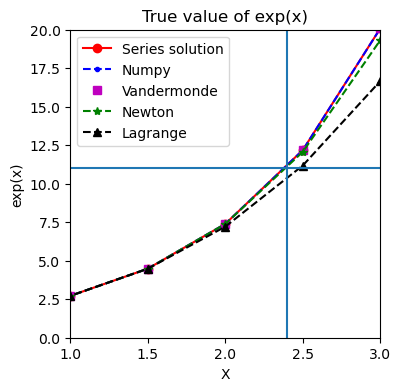

In [61]:
# #True & Approx Error
# #Error V
# e_V = ((answer_v - true) / true) * 100
# e_N = ((answer_n - true) / true) * 100
# e_L = ((answer_l - true) / true) * 100
# print("Approx error of Vandermonde:", e_V)
# print("Approx error of Newton:", e_N)
# print("Approx error of Lagrange:", e_L)

# plt.figure(figsize = (4,4))
# plt.plot(X_a,Y_a,'-ro', label = "Series solution")
# plt.plot(X_a,np.exp(X_a), "--b.", label = "Numpy")
# plt.plot(X_a,np.polyval(coef_v,X_a), "ms", label = "Vandermonde")

# plt.plot(X_n,R, "--g*", label = "Newton")


# plt.plot(X_l,lagrange(X_l,Y_l,n,X_l), "--k^", label = "Lagrange")
# plt.xlim([1,3])
# plt.ylim([0,20])
# plt.vlines(2.4,0,20)
# plt.hlines(np.exp(2.4),0,3)
# plt.xlabel("X")
# plt.ylabel("exp(x)")
# plt.title("True value of exp(x)")
# plt.legend()
# plt.show()